### **Project : "Trash Classification System: Membantu Daur Ulang melalui Teknologi AI"**

**Mengimport Library yang dibutuhkan**

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import os
tf.random.set_seed(42)  # Seed untuk TensorFlow

**Load Dataset dan Split Dataset**

In [23]:
# Path dataset
dataset_path = "dataset-resized"

# Membagi dataset
train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 20% untuk validasi/testing
    subset="training",
    seed=42,
    image_size=(150, 150),  # Ukuran gambar
    batch_size=32,  # Ukuran batch
)

test_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(150, 150),
    batch_size=32,
)

# Menampilkan nama kelas untuk verifikasi
class_names = train_dataset.class_names
# Hitung jumlah sampel dengan iterasi
train_samples = sum(1 for _ in train_dataset.unbatch())
test_samples = sum(1 for _ in test_dataset.unbatch())

print("Kelas:", class_names)
print(f"Jumlah data training: {train_samples}")
print(f"Jumlah data testing: {test_samples}")

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
Kelas: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Jumlah data training: 2022
Jumlah data testing: 505


**Data augmentation dengan preprocessing**

In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

**Normalisasi dataset**

In [25]:
normalization_layer = tf.keras.layers.Rescaling(1. / 255)

train_dataset = train_dataset.map(
    lambda x, y: (normalization_layer(x), y)
)
test_dataset = test_dataset.map(
    lambda x, y: (normalization_layer(x), y)
)

**Membuat direktori log TensorBoard**

In [26]:
# Membuat direktori log TensorBoard
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

**Membangun Model CNN**

In [28]:
# Membangun Model CNN
model = tf.keras.Sequential([
    data_augmentation,  # Data augmentation diterapkan di awal
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax"),  # 6 kelas
])

**Compile Model**

In [29]:
# Compile Model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

**Model Summary**

In [30]:
# Print model summary
model.build(input_shape=(None, 150, 150, 3))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

**Training Model dengan TensorBoard Callback**

In [31]:
# Training Model dengan TensorBoard Callback
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[tensorboard_callback]  # Menambahkan callback TensorBoard
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.2384 - loss: 2.8187 - val_accuracy: 0.4040 - val_loss: 1.4062
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 964ms/step - accuracy: 0.4085 - loss: 1.3919 - val_accuracy: 0.4337 - val_loss: 1.3128
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 49s 723ms/step - accuracy: 0.4698 - loss: 1.3133 - val_accuracy: 0.5287 - val_loss: 1.2036
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 875ms/step - accuracy: 0.5391 - loss: 1.1957 - val_accuracy: 0.4653 - val_loss: 1.2640
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 780ms/step - accuracy: 0.5679 - loss: 1.1685 - val_accuracy: 0.6040 - val_loss: 1.0585
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 664ms/step - accuracy: 0.6041 - loss: 1.0964 - val_accuracy: 0.5525 - val_loss: 1.1522
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6093 - loss: 1.0937 - val_accuracy: 0.6515 - val_loss: 0.9499
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6377 - loss: 0.9911 - val_accuracy: 0.6

**Evaluasi Model**

In [32]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6025 - loss: 1.0592
Test Loss: 1.0587
Test Accuracy: 0.6040


**Plot Training History**

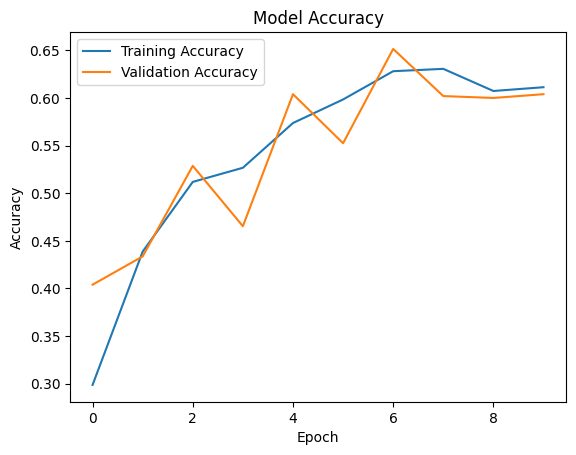

In [33]:
# Plot Training History
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Simpan Model**

In [34]:
# Simpan Model
model.save("4_model.h5")

**Model paling baik adalah trashfix_model.h5**

Berikut merupakan percobaan untuk mengklasifikasikan gambar berdasarkan model **trashfix_model.h5**

Model ini juga sudah di deploy, dengan menjalankan file app.py

Model berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted class: paper


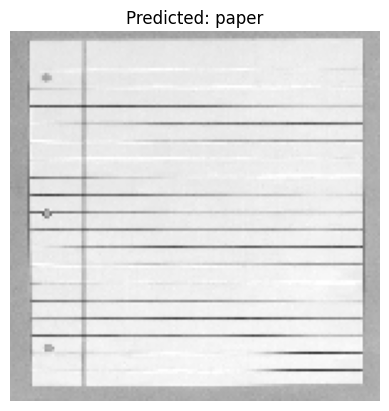

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import UnidentifiedImageError

# Memuat model dari file trashnet_model.h5
model = load_model("trashfix_model.h5")
print("Model berhasil dimuat.")

# Path gambar uji
img_path = "7.jpg"

try:
    # Load gambar dan preprocessing
    img = image.load_img(img_path, target_size=(150, 150))  # Pastikan ukuran sesuai model
    img_array = image.img_to_array(img) / 255.0  # Normalisasi piksel
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi dengan model
    predictions = model.predict(img_array)

    # Ambil probabilitas tertinggi
    class_idx = np.argmax(predictions[0])

    # Daftar kelas
    class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
    predicted_class = class_names[class_idx]

    # Output prediksi
    print(f"Predicted class: {predicted_class}")

    # Tampilkan gambar menggunakan Matplotlib
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

except UnidentifiedImageError:
    print("Gambar tidak dapat dideteksi atau format file tidak valid.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")